In [ ]:
from scipy.io import arff
import urllib.request
import io

url = "http://www.ece.uah.edu/~thm0009/icsdatasets/gas_final.arff"
ftpstream = urllib.request.urlopen(url)
data, meta = arff.loadarff(io.StringIO(ftpstream.read().decode('utf-8')))

In [ ]:
import pandas as pd
df = pd.DataFrame(data)
df['result'] = df['result'].apply(lambda x: int(x.decode('utf-8')))
df

,command_address,response_address,command_memory,response_memory,command_memory_count,response_memory_count,comm_read_function,comm_write_fun,resp_read_fun,resp_write_fun,...,rate,setpoint,control_mode,control_scheme,pump,solenoid,crc_rate,measurement,time,result
0,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,2.0,1.0,0.0,0.0,0.0,0.528736,1.106868,0
1,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,2.0,1.0,0.0,0.0,0.0,0.540230,1.043098,0
2,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,2.0,1.0,0.0,0.0,0.0,0.540230,1.266332,0
3,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,2.0,1.0,0.0,0.0,0.0,0.540230,1.116280,0
4,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,2.0,1.0,0.0,0.0,0.0,0.528736,1.257916,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97014,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,0.0,1.0,0.0,0.0,0.0,0.252874,1.288076,0
97015,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,0.0,1.0,0.0,0.0,0.0,0.275862,1.126445,0
97016,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,0.0,1.0,0.0,0.0,0.0,0.264368,1.251281,0
97017,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,0.0,1.0,0.0,0.0,0.0,0.287356,1.103920,0


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC

import time

In [ ]:
X = df.drop(columns=['result'])
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#XgBoost
model = xgb.XGBClassifier(objective='multi:softmax', num_class=8, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9924


In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12353
           1       0.95      0.97      0.96       555
           2       1.00      1.00      1.00      3094
           3       0.94      0.97      0.96       139
           4       0.98      0.98      0.98      1462
           5       0.96      1.00      0.98       102
           6       0.98      1.00      0.99       341
           7       1.00      1.00      1.00      1358

    accuracy                           0.99     19404
   macro avg       0.98      0.99      0.98     19404
weighted avg       0.99      0.99      0.99     19404



In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 10.5 MB/s eta 0:00:00


In [ ]:
import shap
shap.initjs()
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

[11:30:49] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[11:30:51] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


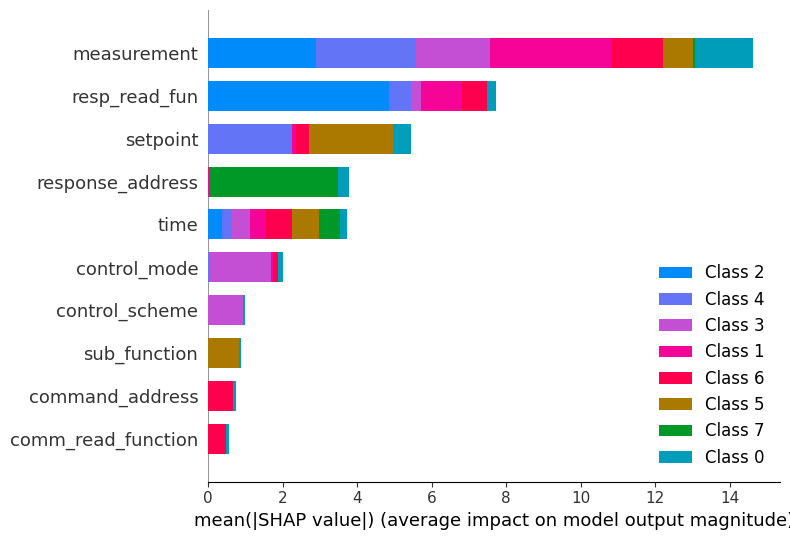

In [ ]:
import matplotlib.pyplot as pl
shap.summary_plot(shap_values, X_test, max_display=10,show=False)
pl.savefig("shap_summary.svg", dpi=1000) #.png,.pdf will also support here
pl.show()

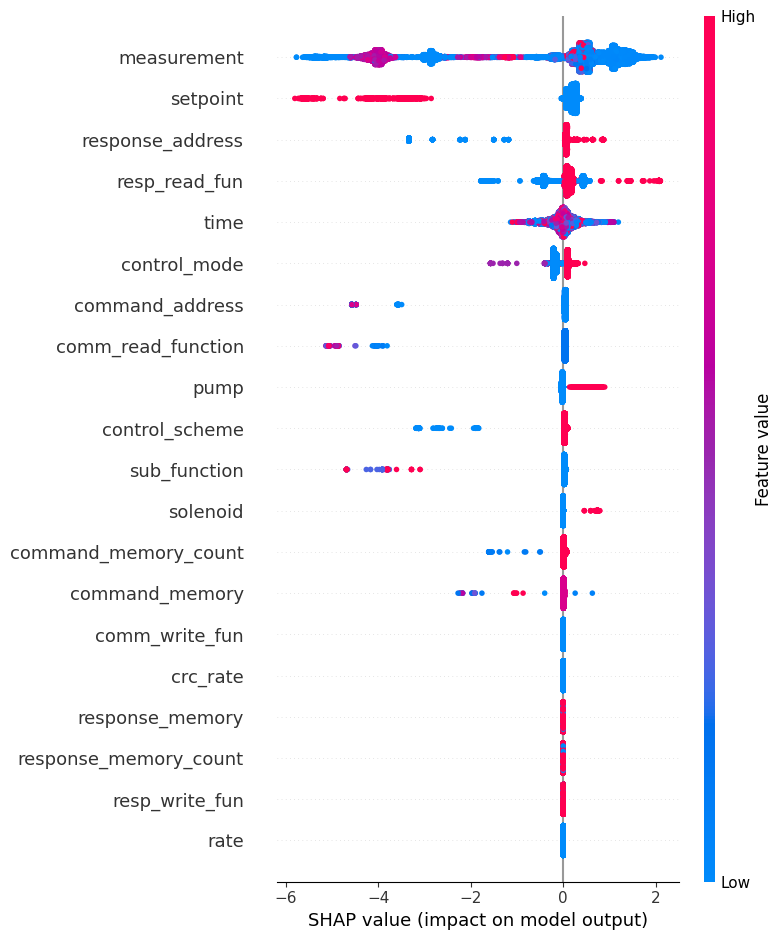

In [ ]:
shap.summary_plot(shap_values[0], X_test)

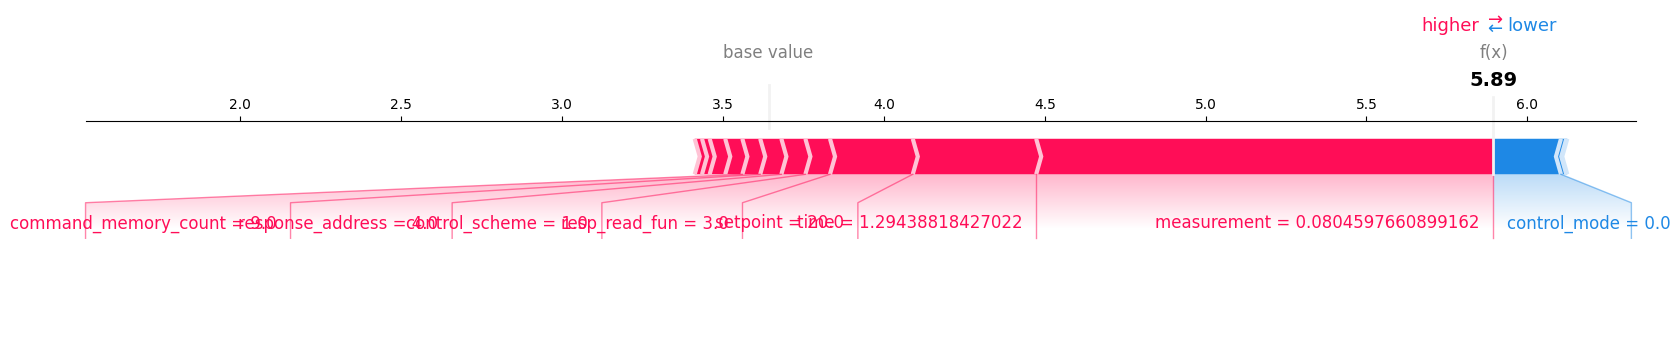

In [ ]:
shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :], matplotlib = True)

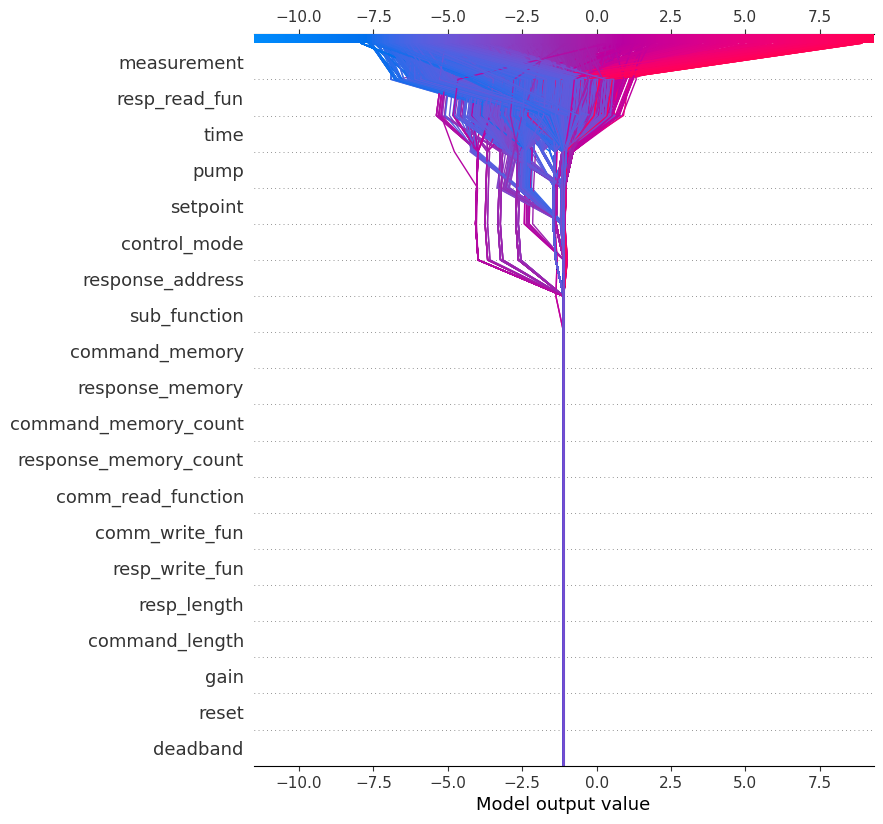

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test.columns, ignore_warnings=True)

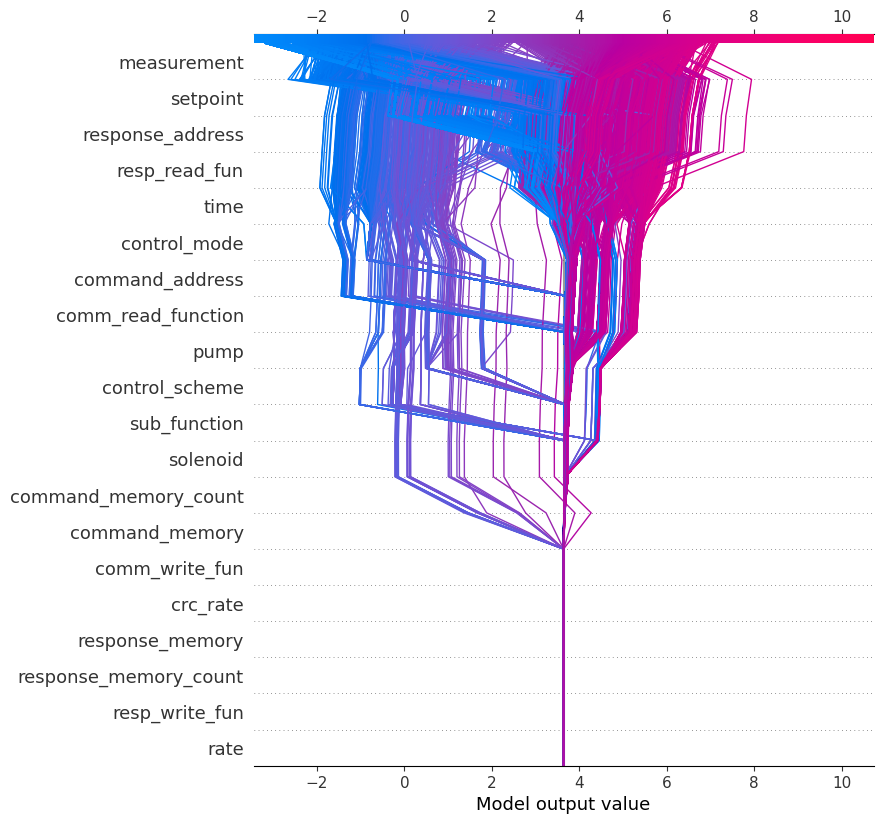

In [ ]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], X_test.columns, ignore_warnings=True)

In [ ]:
shap.decision_plot(explainer.expected_value[3], shap_values[3], X_test.columns, ignore_warnings=True)